# Lifestyle Data Preprocessing

This notebook preprocesses `life.csv` and `life_metadata.csv` to create a unified dataset for:
- **Model 2A**: Lifestyle Classifier (Classification)
- **Model 2B**: Activity Predictor (Regression)
- **Model 2C**: Health Risk Scorer (Regression)

**Target variables to create:**
- `lifestyle_category`: Categorical (sedentary/active/athletic) for Model 2A
- `next_day_calories_burned`: Continuous (predicts next day's calorie burn) for Model 2B
- `health_risk_score`: Continuous 0-100 for Model 2C

**Output:** `data/processed/lifestyle_processed.csv`

**Note:** The lifestyle dataset doesn't contain daily steps data. We use workout frequency, session duration, and calories burned as activity indicators instead.


## Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


Libraries imported successfully!


## Load Data


In [ ]:
life = pd.read_csv('../data/life.csv')
print(f"Shape: {life.shape}")
life.head()


Life Dataset Shape: (20000, 54)

Column names:
['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI', 'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins', 'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g', 'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method', 'prep_time_min', 'cook_time_min', 'rating', 'Name of Exercise', 'Sets', 'Reps', 'Benefit', 'Burns Calories (per 30 min)', 'Target Muscle Group', 'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle', 'Workout', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg', 'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn', 'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin']

First few rows:


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Daily meals frequency,Physical exercise,Carbs,Proteins,Fats,Calories,meal_name,meal_type,diet_type,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,Name of Exercise,Sets,Reps,Benefit,Burns Calories (per 30 min),Target Muscle Group,Equipment Needed,Difficulty Level,Body Part,Type of Muscle,Workout,BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,26.800377,1.50,3.99,2.01,24.87,2.99,0.01,267.68,106.05,71.63,1806.0,Other,Lunch,Vegan,31.77,1729.94,285.05,120.47,Grilled,16.24,110.79,1.31,Decline Push-ups,4.99,20.91,Improves shoulder health and posture,342.58,"Shoulders, Triceps",Cable Machine,Advanced,Legs,Lats,Dumbbell flyes,24.870447,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,27.655021,1.90,4.00,2.01,23.48,3.01,0.97,214.32,85.41,56.97,1577.0,Other,Lunch,Vegetarian,12.34,693.08,300.61,109.15,Fried,16.47,12.01,1.92,Bear Crawls,4.01,16.15,Strengthens lower abs,357.16,"Back, Core, Shoulders",Step or Box,Intermediate,Chest,Lats,Lateral raises,23.479709,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,24.320821,1.88,2.99,1.02,21.15,1.99,-0.02,246.04,98.11,65.48,1608.0,Other,Breakfast,Paleo,42.81,2142.48,215.42,399.43,Boiled,54.35,6.09,4.70,Dips,5.00,21.90,Builds chest strength,359.63,"Quadriceps, Glutes",Step or Box,Intermediate,Arms,Grip Strength,Standing calf raises,21.148123,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,32.813572,2.50,3.99,1.99,32.45,3.00,0.04,203.22,80.84,54.56,2657.0,Other,Lunch,Paleo,9.34,123.20,9.70,314.31,Fried,27.73,103.72,4.85,Mountain Climbers,4.01,16.92,Improves coordination and cardiovascular health,351.65,"Biceps, Forearms",Parallel Bars or Chair,Advanced,Shoulders,Upper,Incline dumbbell flyes,32.449827,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,17.307319,2.91,4.00,2.00,14.83,3.00,3.00,332.79,133.05,88.43,1470.0,Other,Breakfast,Vegan,23.78,1935.11,116.89,99.22,Baked,34.16,46.55,3.07,Bicep Curls,4.99,15.01,Targets obliques and improves core rotation,329.36,"Chest, Triceps",Wall,Advanced,Abs,Wrist Flexors,Military press,14.831372,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


In [ ]:
life_meta = pd.read_csv('../data/life_metadata.csv')
print(f"Shape: {life_meta.shape}")
life_meta.head()


Life Metadata Dataset Shape: (168, 54)

Column names:
['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI', 'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins', 'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g', 'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method', 'prep_time_min', 'cook_time_min', 'rating', 'Name of Exercise', 'Sets', 'Reps', 'Benefit', 'Burns Calories (per 30 min)', 'Target Muscle Group', 'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle', 'Workout', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg', 'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn', 'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin']

First few rows:


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Daily meals frequency,Physical exercise,Carbs,Proteins,Fats,Calories,meal_name,meal_type,diet_type,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,Name of Exercise,Sets,Reps,Benefit,Burns Calories (per 30 min),Target Muscle Group,Equipment Needed,Difficulty Level,Body Part,Type of Muscle,Workout,BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,26.800377,1.50,3.99,2.01,24.87,2.99,0.01,267.68,106.05,71.63,1806.0,Grilled Vegan Lunch,Lunch,Vegan,31.77,1729.94,285.05,120.47,Grilled,16.24,110.79,1.31,Decline Push-ups,4.99,20.91,Improves shoulder health and posture,342.58,"Shoulders, Triceps",Cable Machine,Advanced,Legs,Lats,Dumbbell flyes,24.870447,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,27.655021,1.90,4.00,2.01,23.48,3.01,0.97,214.32,85.41,56.97,1577.0,Fried Vegetarian Lunch,Lunch,Vegetarian,12.34,693.08,300.61,109.15,Fried,16.47,12.01,1.92,Bear Crawls,4.01,16.15,Strengthens lower abs,357.16,"Back, Core, Shoulders",Step or Box,Intermediate,Chest,Lats,Lateral raises,23.479709,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,24.320821,1.88,2.99,1.02,21.15,1.99,-0.02,246.04,98.11,65.48,1608.0,Boiled Paleo Breakfast,Breakfast,Paleo,42.81,2142.48,215.42,399.43,Boiled,54.35,6.09,4.70,Dips,5.00,21.90,Builds chest strength,359.63,"Quadriceps, Glutes",Step or Box,Intermediate,Arms,Grip Strength,Standing calf raises,21.148123,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,32.813572,2.50,3.99,1.99,32.45,3.00,0.04,203.22,80.84,54.56,2657.0,Fried Paleo Lunch,Lunch,Paleo,9.34,123.20,9.70,314.31,Fried,27.73,103.72,4.85,Mountain Climbers,4.01,16.92,Improves coordination and cardiovascular health,351.65,"Biceps, Forearms",Parallel Bars or Chair,Advanced,Shoulders,Upper,Incline dumbbell flyes,32.449827,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,17.307319,2.91,4.00,2.00,14.83,3.00,3.00,332.79,133.05,88.43,1470.0,Baked Vegan Breakfast,Breakfast,Vegan,23.78,1935.11,116.89,99.22,Baked,34.16,46.55,3.07,Bicep Curls,4.99,15.01,Targets obliques and improves core rotation,329.36,"Chest, Triceps",Wall,Advanced,Abs,Wrist Flexors,Military press,14.831372,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


In [ ]:
print(f"Life: {len(life)}, Metadata: {len(life_meta)}")


Are columns identical? True

Life records: 20000
Life_metadata records: 168

Datasets have different number of records - they are complementary!


## EDA


In [ ]:
df_life = pd.concat([life, life_meta], axis=0, ignore_index=True)
print(f"Combined shape: {df_life.shape}")
df_life.info()
df_life.describe()


Combined Lifestyle Dataset Shape: (20168, 54)

DATA INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20168 entries, 0 to 20167
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20168 non-null  float64
 1   Gender                          20168 non-null  object 
 2   Weight (kg)                     20168 non-null  float64
 3   Height (m)                      20168 non-null  float64
 4   Max_BPM                         20168 non-null  float64
 5   Avg_BPM                         20168 non-null  float64
 6   Resting_BPM                     20168 non-null  float64
 7   Session_Duration (hours)        20168 non-null  float64
 8   Calories_Burned                 20168 non-null  float64
 9   Workout_Type                    20168 non-null  object 
 10  Fat_Percentage                  20168 non-null  float64
 11  Water_Intake (liters)           2016

## Data Cleaning


In [ ]:
df_processed = df_life.copy()
df_processed = df_processed.drop_duplicates()

df_processed = df_processed[(df_processed['BMI'] >= 10) & (df_processed['BMI'] <= 60)]
df_processed = df_processed[(df_processed['Age'] >= 10) & (df_processed['Age'] <= 100)]
df_processed = df_processed[(df_processed['Calories_Burned'] >= 0) & (df_processed['Calories_Burned'] <= 5000)]
df_processed = df_processed[(df_processed['Session_Duration (hours)'] >= 0) & (df_processed['Session_Duration (hours)'] <= 10)]

numerical_cols = df_processed.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    if df_processed[col].isnull().sum() > 0:
        df_processed[col].fillna(df_processed[col].median(), inplace=True)

categorical_cols = df_processed.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df_processed[col].isnull().sum() > 0:
        df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)

print(f"Shape: {df_processed.shape}, Missing: {df_processed.isnull().sum().sum()}")


Removed 0 duplicate rows

Cleaned dataset shape: (20168, 54)
Remaining missing values: 0


## Feature Engineering


In [ ]:
df_processed['heart_rate_reserve'] = df_processed['Max_BPM'] - df_processed['Resting_BPM']
df_processed['training_intensity'] = (df_processed['Avg_BPM'] - df_processed['Resting_BPM']) / df_processed['heart_rate_reserve']
df_processed['calories_per_hour'] = df_processed['Calories_Burned'] / df_processed['Session_Duration (hours)']
df_processed['lean_body_mass'] = df_processed['Weight (kg)'] * (1 - df_processed['Fat_Percentage'] / 100)
df_processed['fat_mass'] = df_processed['Weight (kg)'] * (df_processed['Fat_Percentage'] / 100)
df_processed['water_per_kg'] = df_processed['Water_Intake (liters)'] / df_processed['Weight (kg)']
df_processed['protein_per_kg'] = df_processed['Proteins'] / df_processed['Weight (kg)']
df_processed['caloric_balance'] = df_processed['Calories'] - df_processed['Calories_Burned']
df_processed['weekly_activity_load'] = df_processed['Workout_Frequency (days/week)'] * df_processed['Session_Duration (hours)']
df_processed['bmi_category'] = pd.cut(df_processed['BMI'], bins=[0, 18.5, 25, 30, 100], labels=['underweight', 'normal', 'overweight', 'obese'])
df_processed['age_group'] = pd.cut(df_processed['Age'], bins=[0, 25, 40, 60, 100], labels=['young', 'middle_aged', 'senior', 'elderly'])
intensity_mapping = {'Yoga': 1, 'Cardio': 2, 'HIIT': 3, 'Strength': 2}
df_processed['workout_intensity'] = df_processed['Workout_Type'].map(intensity_mapping).fillna(2)
print(f"Features: {df_processed.shape[1]}")

Feature engineering complete!

New features created: 11
Total features: 65


## Target Variables


TARGET 1: lifestyle_category (Classification)
lifestyle_category
active       10846
sedentary     8303
athletic      1019
Name: count, dtype: int64

Percentage distribution:
lifestyle_category
active       53.778263
sedentary    41.169179
athletic      5.052559
Name: proportion, dtype: float64

TARGET 2: next_day_calories_burned (Regression)
count    20168.000000
mean      1280.912615
std        502.600894
min        323.990000
25%        910.800000
50%       1232.115000
75%       1554.072500
max       2890.820000
Name: next_day_calories_burned, dtype: float64

TARGET 3: health_risk_score (Regression)
count    20168.000000
mean        27.041303
std         18.124198
min          0.000000
25%         14.000000
50%         24.000000
75%         38.000000
max         76.000000
Name: health_risk_score, dtype: float64

Risk distribution:
health_risk_score
low          10210
moderate      5486
high          3337
very_high        1
Name: count, dtype: int64


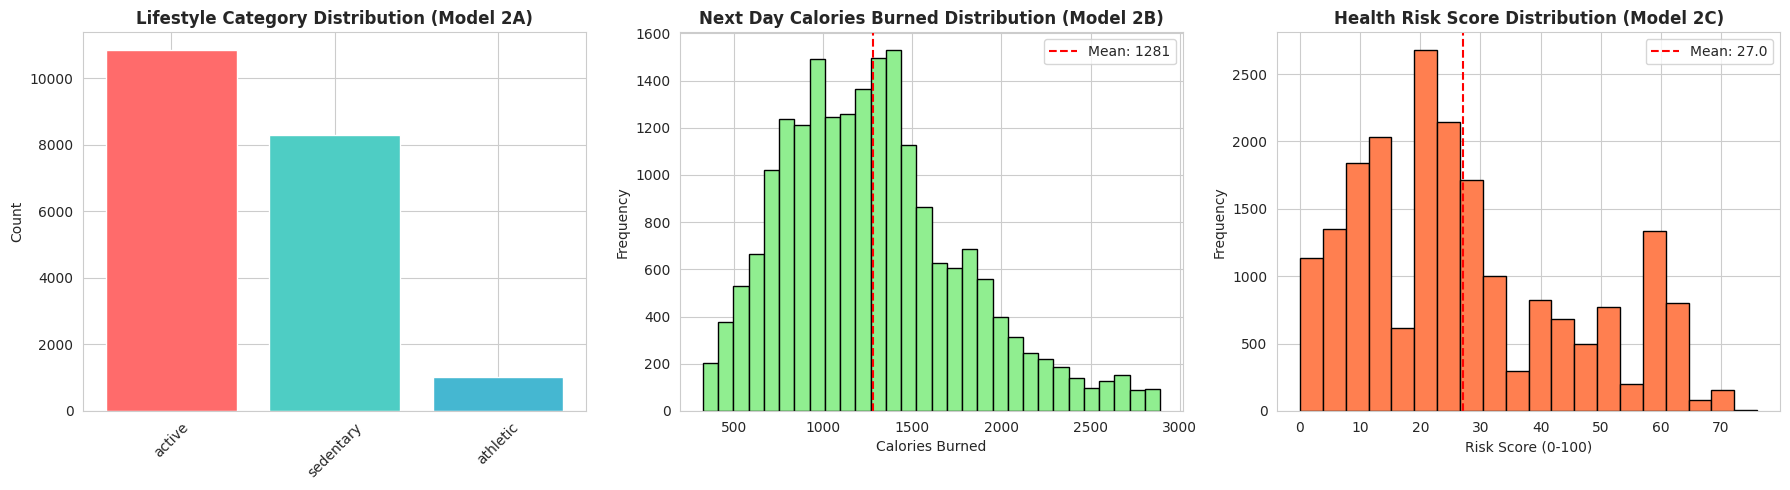


All target variables created successfully!


In [ ]:
def classify_lifestyle(row):
    workout_freq = row['Workout_Frequency (days/week)']
    calories_burned = row['Calories_Burned']
    session_duration = row['Session_Duration (hours)']
    if workout_freq >= 5 and calories_burned >= 1500 and session_duration >= 1.0:
        return 'athletic'
    elif workout_freq >= 3 and calories_burned >= 800 and session_duration >= 0.5:
        return 'active'
    else:
        return 'sedentary'

df_processed['lifestyle_category'] = df_processed.apply(classify_lifestyle, axis=1)
print(df_processed['lifestyle_category'].value_counts())

df_processed = df_processed.sort_values('Calories_Burned').reset_index(drop=True)
df_processed['next_day_calories_burned'] = df_processed['Calories_Burned'].shift(-1)
df_processed['next_day_calories_burned'].fillna(df_processed['Calories_Burned'].mean(), inplace=True)
print(df_processed['next_day_calories_burned'].describe())

def calculate_health_risk(row):
    risk_score = 0
    bmi = row['BMI']
    if bmi < 18.5:
        risk_score += 15
    elif 18.5 <= bmi < 25:
        risk_score += 0
    elif 25 <= bmi < 30:
        risk_score += 10
    else:
        risk_score += 25
    fat_pct = row['Fat_Percentage']
    if fat_pct > 30:
        risk_score += 20
    elif fat_pct > 25:
        risk_score += 10
    elif fat_pct < 10:
        risk_score += 15
    else:
        risk_score += 0
    workout_freq = row['Workout_Frequency (days/week)']
    calories_burned = row['Calories_Burned']
    if workout_freq < 2 and calories_burned < 500:
        risk_score += 15
    elif workout_freq < 3 and calories_burned < 1000:
        risk_score += 10
    elif workout_freq < 4 and calories_burned < 1500:
        risk_score += 5
    resting_bpm = row['Resting_BPM']
    if resting_bpm > 80:
        risk_score += 12
    elif resting_bpm > 70:
        risk_score += 6
    elif resting_bpm < 50:
        risk_score += 8
    cal_balance = row['caloric_balance']
    if abs(cal_balance) > 1000:
        risk_score += 8
    elif abs(cal_balance) > 500:
        risk_score += 4
    return min(risk_score, 100)

df_processed['health_risk_score'] = df_processed.apply(calculate_health_risk, axis=1)
print(df_processed['health_risk_score'].describe())

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
lifestyle_counts = df_processed['lifestyle_category'].value_counts()
axes[0].bar(lifestyle_counts.index, lifestyle_counts.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0].set_title('Lifestyle Category Distribution (Model 2A)', fontweight='bold')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
axes[1].hist(df_processed['next_day_calories_burned'], bins=30, edgecolor='black', color='lightgreen')
axes[1].set_title('Next Day Calories Burned Distribution (Model 2B)', fontweight='bold')
axes[1].set_xlabel('Calories Burned')
axes[1].set_ylabel('Frequency')
axes[1].axvline(df_processed['next_day_calories_burned'].mean(), color='red', linestyle='--', label=f'Mean: {df_processed["next_day_calories_burned"].mean():.0f}')
axes[1].legend()
axes[2].hist(df_processed['health_risk_score'], bins=20, edgecolor='black', color='coral')
axes[2].set_title('Health Risk Score Distribution (Model 2C)', fontweight='bold')
axes[2].set_xlabel('Risk Score (0-100)')
axes[2].set_ylabel('Frequency')
axes[2].axvline(df_processed['health_risk_score'].mean(), color='red', linestyle='--', label=f'Mean: {df_processed["health_risk_score"].mean():.1f}')
axes[2].legend()
plt.tight_layout()
plt.show()

## Normalize & Encode


In [ ]:
df_final = df_processed.copy()
features_to_standardize = [
    'Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
    'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)',
    'Workout_Frequency (days/week)', 'Carbs', 'Proteins', 'Fats', 'Calories',
    'heart_rate_reserve', 'training_intensity', 'calories_per_hour', 'lean_body_mass',
    'fat_mass', 'water_per_kg', 'protein_per_kg', 'caloric_balance', 'weekly_activity_load'
]
scaler = StandardScaler()
for feature in features_to_standardize:
    if feature in df_final.columns:
        df_final[f'{feature}_scaled'] = scaler.fit_transform(df_final[[feature]])

label_encoder_lifestyle = LabelEncoder()
df_final['lifestyle_category_encoded'] = label_encoder_lifestyle.fit_transform(df_final['lifestyle_category'])
for i, category in enumerate(label_encoder_lifestyle.classes_):
    print(f"{category} -> {i}")

categorical_to_encode = ['Gender', 'Workout_Type', 'diet_type', 'meal_type', 'Difficulty Level', 'bmi_category', 'age_group']
for feature in categorical_to_encode:
    if feature in df_final.columns:
        dummies = pd.get_dummies(df_final[feature], prefix=feature, drop_first=False)
        df_final = pd.concat([df_final, dummies], axis=1)

print(f"Final shape: {df_final.shape}")


Standardized features created!

Lifestyle Category Encoding:
  active -> 0
  athletic -> 1
  sedentary -> 2

Final dataset shape: (20168, 121)
Total features: 121


## Save Data


In [ ]:
output_path = '../data/processed/lifestyle_processed.csv'
df_final.to_csv(output_path, index=False)
print(f"Saved: {output_path}")
print(f"Records: {len(df_final)}, Features: {df_final.shape[1]}")


Processed data saved to: ../data/processed/lifestyle_processed.csv

Dataset Summary:
Total Records: 20168
Total Features: 121

TARGET VARIABLES:

1. lifestyle_category (Model 2A - Classification)
   - Classes: ['sedentary', 'active', 'athletic']
   - Distribution:
     active: 10846 (53.8%)
     sedentary: 8303 (41.2%)
     athletic: 1019 (5.1%)

2. next_day_calories_burned (Model 2B - Regression)
   - Range: 324 - 2891
   - Mean: 1281
   - Std: 503

3. health_risk_score (Model 2C - Regression)
   - Range: 0.0 - 76.0
   - Mean: 27.0
   - Std: 18.1

KEY FEATURES AVAILABLE:

Physical Features:
  - Age
  - Weight (kg)
  - Height (m)
  - BMI
  - Fat_Percentage
  - lean_body_mass

Workout Features:
  - Workout_Type
  - Session_Duration (hours)
  - Calories_Burned
  - Workout_Frequency (days/week)
  - workout_intensity

Nutrition Features:
  - Carbs
  - Proteins
  - Fats
  - Calories
  - Water_Intake (liters)
  - protein_per_kg
  - caloric_balance

Heart Rate Features:
  - Max_BPM
  - Avg_BP